# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cities_data = []
cities_name = []
cities_lat = []
cities_lng = []
cities_max = []
cities_hum = []
cities_cloud = []
cities_wind = []
cities_country = []
cities_date = []

for city in cities:
    try:
        response = requests.get(f"{url}q={city}&appid={weather_api_key}&units=imperial").json()
        cities_name.append(response["name"])
        cities_lat.append(response["coord"]["lat"])
        cities_lng.append(response["coord"]["lon"])
        cities_max.append(response["main"]["temp_max"])
        cities_hum.append(response["main"]["humidity"])
        cities_cloud.append(response["clouds"]["all"])
        cities_wind.append(response["wind"]["speed"])
        cities_country.append(response["sys"]["country"])
        cities_date.append(response["dt"])
        cities_data.append(response)
        print(f"Processing record {cities_data.index(response) + 1} of Set | {city}")
    except:
        print(f"City not found. Skipping...")

Processing record 1 of Set | kaitangata
Processing record 2 of Set | nikolskoye
Processing record 3 of Set | mitsamiouli
Processing record 4 of Set | moron
Processing record 5 of Set | athens
Processing record 6 of Set | vaini
Processing record 7 of Set | tilichiki
Processing record 8 of Set | tuktoyaktuk
Processing record 9 of Set | cherskiy
Processing record 10 of Set | leningradskiy
Processing record 11 of Set | cape town
City not found. Skipping...
Processing record 12 of Set | qaanaaq
Processing record 13 of Set | gambela
Processing record 14 of Set | mogadishu
Processing record 15 of Set | barrow
Processing record 16 of Set | mountain home
Processing record 17 of Set | bac lieu
Processing record 18 of Set | castro
Processing record 19 of Set | palmer
City not found. Skipping...
City not found. Skipping...
Processing record 20 of Set | laguna
Processing record 21 of Set | nagaur
Processing record 22 of Set | santa isabel do rio negro
Processing record 23 of Set | dalvik
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({
        "City": cities_name,
        "Lat": cities_lat,
        "Lng": cities_lng,
        "Max Temp": cities_max,
        "Humidity": cities_hum,
        "Cloudiness": cities_cloud,
        "Wind Speed": cities_wind,
        "Country": cities_country,
        "Date": cities_date
})

cities_df.to_csv("./Cities_Weather_Data.csv", index=False, header=True)

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,52.00,92,99,3.00,NZ,1612894451
1,Nikolskoye,59.7035,30.7861,7.00,85,98,4.47,RU,1612894459
2,Mitsamiouli,-11.3847,43.2844,82.74,77,91,14.97,KM,1612894493
3,Morón,-34.6534,-58.6198,72.00,78,90,10.36,AR,1612894494
4,Athens,37.9795,23.7162,63.00,63,20,2.30,GR,1612894239
...,...,...,...,...,...,...,...,...,...
542,Mound,44.9366,-93.6661,7.00,68,70,8.99,US,1612894649
543,Warrnambool,-38.3833,142.4833,57.99,90,0,1.01,AU,1612894650
544,Cortez,37.3489,-108.5859,51.80,25,40,4.50,US,1612894650
545,Grand Island,40.9250,-98.3420,3.99,71,1,4.61,US,1612894650


In [5]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.012199,16.744896,51.120969,72.475320,56.248629,8.078154,1.612895e+09
std,33.100352,92.075458,32.990288,19.809829,37.893484,6.102649,8.095160e+01
min,-54.800000,-179.166700,-43.600000,11.000000,0.000000,0.250000,1.612894e+09
25%,-7.168050,-66.241050,30.100000,64.000000,20.000000,3.980000,1.612894e+09
50%,21.333300,20.252100,64.400000,77.000000,75.000000,6.710000,1.612895e+09
75%,48.350000,98.240350,77.490000,87.500000,90.000000,10.360000,1.612895e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,42.230000,1.612895e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

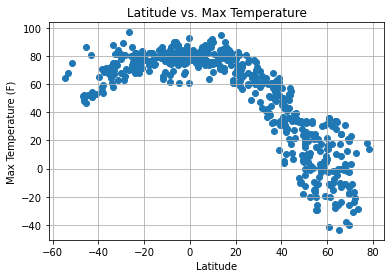

In [8]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

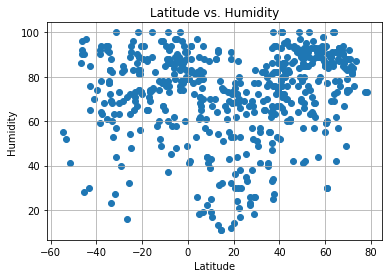

In [9]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

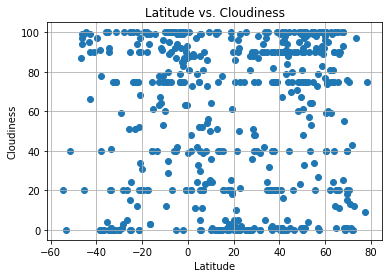

In [10]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

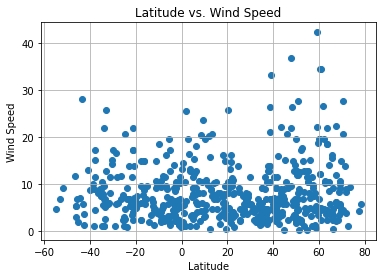

In [11]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid()

plt.show()

## Linear Regression

In [12]:
north_df = cities_df.loc[cities_df["Lat"] > 0]
south_df = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.48x + 95.85
The r-value is: -0.8871073344413626


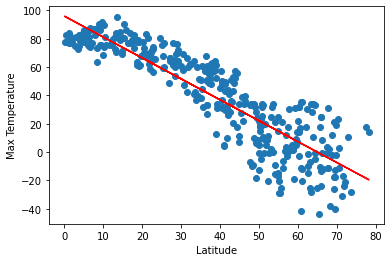

In [13]:
plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Max Temp"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.36x + 81.84
The r-value is: 0.5449721553772646


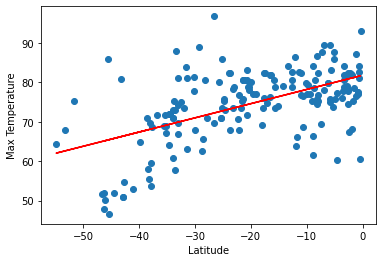

In [14]:
plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Max Temp"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x + 55.85
The r-value is: 0.38700835654730054


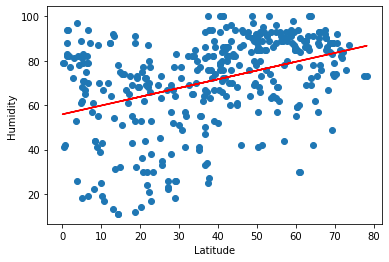

In [15]:
plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Humidity"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.26x + 80.9
The r-value is: 0.218107165791228


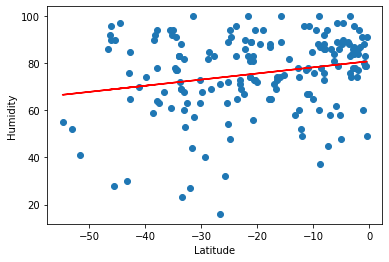

In [16]:
plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Humidity"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.34x + 41.4
The r-value is: 0.18801421089126624


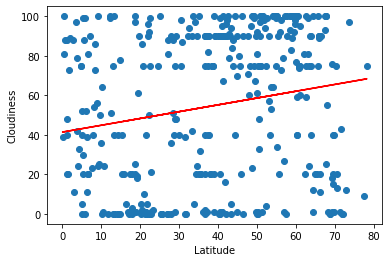

In [17]:
plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Cloudiness"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.84x + 76.47
The r-value is: 0.3073766601448247


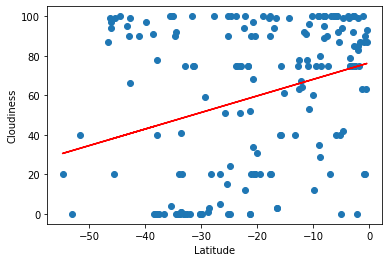

In [18]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Cloudiness"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 7.47
The r-value is: 0.07129746003978159


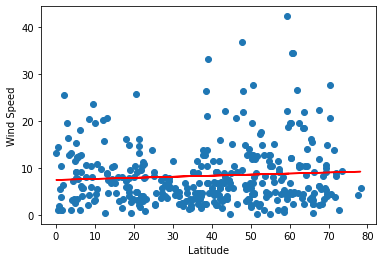

In [19]:
plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Wind Speed"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x + 6.68
The r-value is: -0.12078682597875423


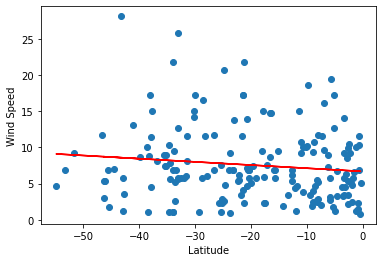

In [20]:
plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Wind Speed"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()